## HT4 - Proyecto 2. Entrega 2
### Árboles de Decisión
Diego Duarte 22075 - José Marchena 22398

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
import regresion


#### Árboles de Regresión

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Importar Datos
house_prices=pd.read_csv("train.csv")

print(house_prices.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [3]:
X = regresion.trans_categorical(house_prices).dropna()
house_prices.info()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
from sklearn.model_selection import train_test_split

# Separar la variable objetivo (SalePrice)
y = np.log(X.pop("SalePrice"))

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, train_size=0.7, random_state=42
)

# Verificar tamaños de los conjuntos
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(770, 57)
(330, 57)
(770,)
(330,)


In [5]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)
categorical_columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler() 

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('scaler', numerical_preprocessor, numerical_columns) 
])


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"regressor__max_depth": np.arange(2, 10, 1)} # sobre qué numero de max-depth vamos a iterar
pipeline = Pipeline(
    [('preprocessor',preprocessor),
     ('regressor',DecisionTreeRegressor())]) # probamos múltiples modelos con el preprocessor previo
params = [{
    "regressor__max_depth": np.arange(2, 10, 1)
}]

modelo1 = GridSearchCV(pipeline, param_grid=params, n_jobs=2, cv=2,scoring="neg_root_mean_squared_error") # evaluamos usando CV para ver cuál es el mejor modelo de todos 
modelo1.fit(X_train,y_train)
modelo1.best_params_

{'regressor__max_depth': 4}

In [8]:
modelo1_pred = modelo1.predict(X_test)
modelo1_pred


array([11.67508511, 12.58686156, 11.67508511, 12.11497309, 11.89276474,
       11.89276474, 11.89276474, 12.88199193, 11.67508511, 12.58686156,
       11.67508511, 11.67508511, 12.0796791 , 11.29452192, 12.58686156,
       12.38428491, 12.0796791 , 12.0796791 , 11.60877045, 12.35277539,
       12.11497309, 12.58686156, 11.88144955, 12.0796791 , 12.0796791 ,
       11.29452192, 11.89276474, 12.58686156, 12.0796791 , 11.88144955,
       11.89276474, 12.38428491, 11.67508511, 12.35277539, 11.29452192,
       12.35277539, 11.89276474, 12.88199193, 12.11497309, 11.29452192,
       11.67508511, 12.88199193, 11.88144955, 12.58686156, 11.67508511,
       12.55473531, 11.67508511, 11.67508511, 11.89276474, 12.58686156,
       12.11497309, 11.67508511, 12.58686156, 12.11497309, 12.11497309,
       12.35277539, 12.58686156, 11.88144955, 11.67508511, 11.89276474,
       11.64684873, 12.11497309, 12.35277539, 12.0796791 , 11.89276474,
       11.59125478, 12.0796791 , 12.58686156, 11.67508511, 11.89

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, modelo1_pred)
print(f"MAE: {mae:.4f}")

mse = mean_squared_error(y_test, modelo1_pred)
print(f"MSE: {mse:.4f}")

MAE: 0.1555
MSE: 0.0504


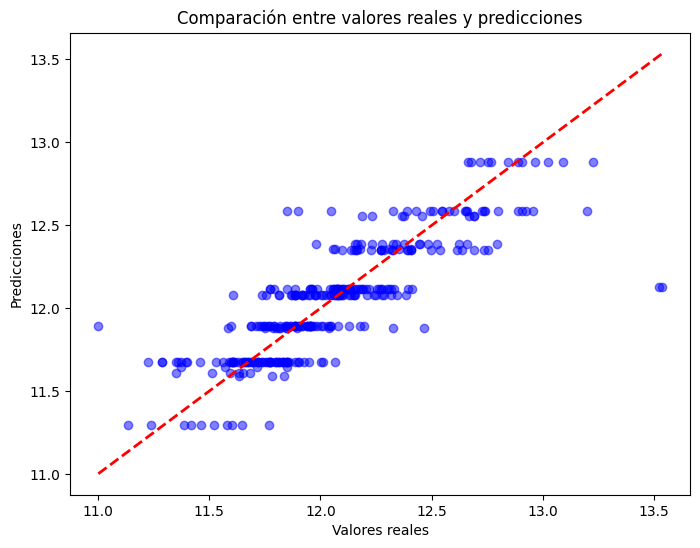

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, modelo1_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea diagonal
plt.title("Comparación entre valores reales y predicciones")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()

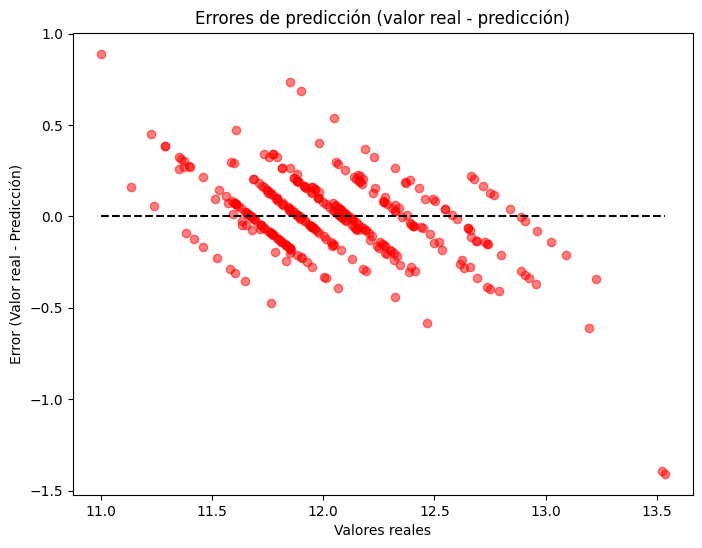

In [11]:
errores = modelo1_pred - y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, errores, color='red', alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='black', linestyles='dashed')
plt.title("Errores de predicción (valor real - predicción)")
plt.xlabel("Valores reales")
plt.ylabel("Error (Valor real - Predicción)")
plt.show()

In [12]:
param_grids = [
    {"regressor__max_depth": np.arange(10, 21, 1)},  # Segundo modelo: max_depth de 10 a 20
    {"regressor__max_depth": np.arange(1, 6, 1)},    # Tercer modelo: max_depth de 1 a 5
    {"regressor__max_depth": np.arange(5, 16, 1)}    # Cuarto modelo: max_depth de 5 a 15
]

In [13]:
modelos_resultados = []

# Realizar GridSearchCV con los diferentes rangos de max_depth
for param_grid in param_grids:
    modelo = GridSearchCV(pipeline, param_grid=param_grid, n_jobs=2, cv=2, scoring="neg_root_mean_squared_error")
    modelo.fit(X_train, y_train)
    modelos_resultados.append(modelo)
    print(f"Mejores parámetros para rango {param_grid['regressor__max_depth'][0]}-{param_grid['regressor__max_depth'][-1]}: {modelo.best_params_}")

Mejores parámetros para rango 10-20: {'regressor__max_depth': 13}
Mejores parámetros para rango 1-5: {'regressor__max_depth': 4}
Mejores parámetros para rango 5-15: {'regressor__max_depth': 6}


Modelo 1 - Parámetros:
{'regressor__max_depth': 13}
Modelo 1 - MAE: 0.1375
Modelo 1 - MSE: 0.0351


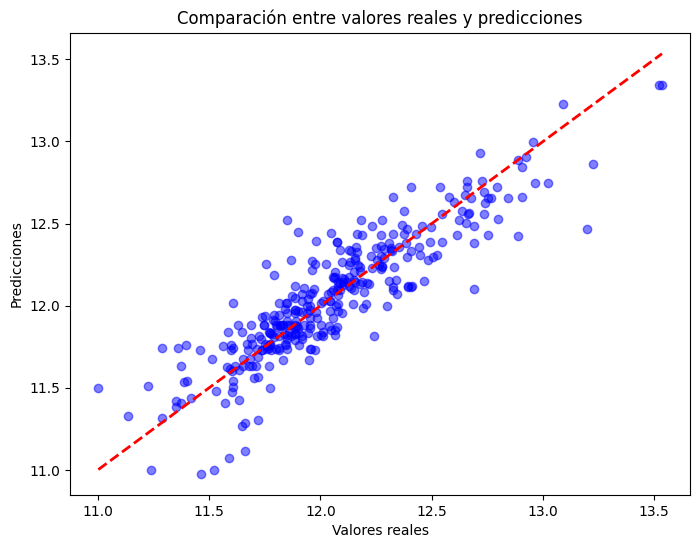

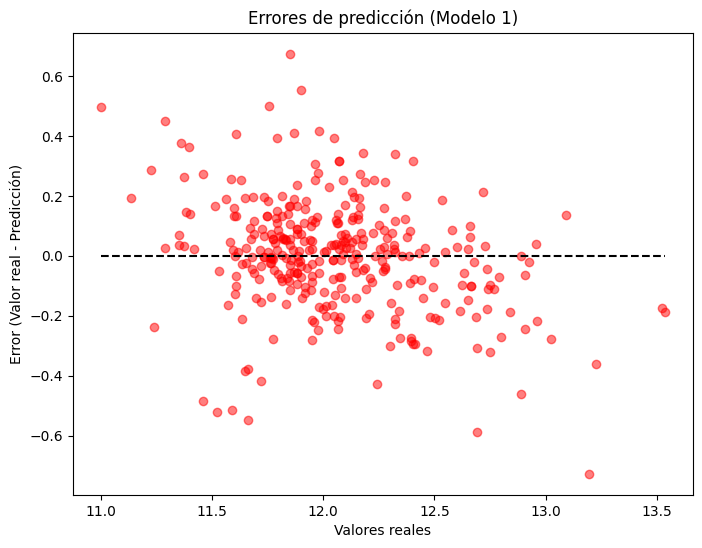

Modelo 2 - Parámetros:
{'regressor__max_depth': 4}
Modelo 2 - MAE: 0.1509
Modelo 2 - MSE: 0.0410


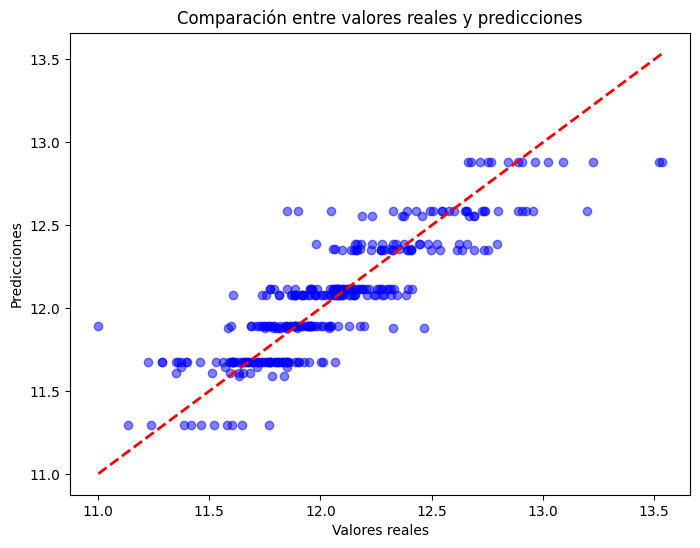

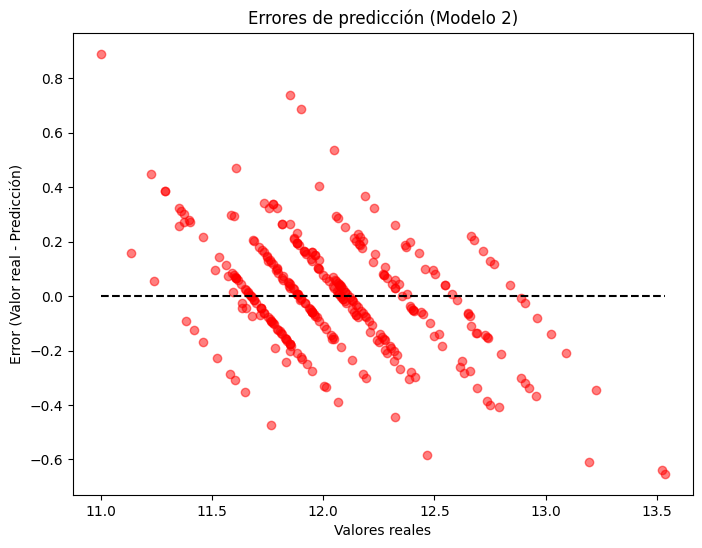

Modelo 3 - Parámetros:
{'regressor__max_depth': 6}
Modelo 3 - MAE: 0.1400
Modelo 3 - MSE: 0.0397


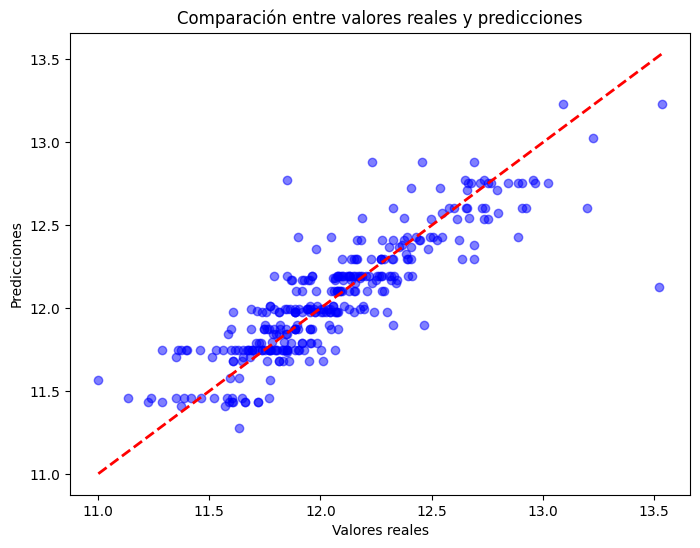

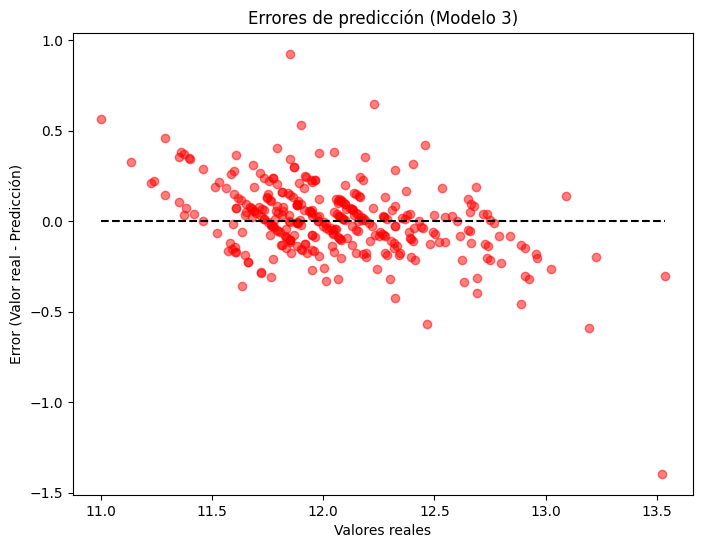

In [14]:
for i, modelo in enumerate(modelos_resultados):
    print(f"Modelo {i+1} - Parámetros:")
    print(modelo.best_params_)
    
    # Predicciones para el modelo i
    modelo = modelo.predict(X_test)
    
    # Calcular MAE y MSE
    mae = mean_absolute_error(y_test, modelo)
    print(f"Modelo {i+1} - MAE: {mae:.4f}")

    mse = mean_squared_error(y_test, modelo)
    print(f"Modelo {i+1} - MSE: {mse:.4f}")

    # Comparación entre valores reales y predicciones
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, modelo, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea diagonal
    plt.title("Comparación entre valores reales y predicciones")
    plt.xlabel("Valores reales")
    plt.ylabel("Predicciones")
    plt.show()

    # Errores de predicción (valor real - predicción)
    errores = modelo - y_test
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, errores, color='red', alpha=0.5)
    plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='black', linestyles='dashed')
    plt.title(f"Errores de predicción (Modelo {i+1})")
    plt.xlabel("Valores reales")
    plt.ylabel("Error (Valor real - Predicción)")
    plt.show()

In [15]:
MAE_Prev = 15345
MSE_Prev = 3.83e+7

modelo_seleccionado = modelos_resultados[2]
modelo_pred = modelo_seleccionado.predict(X_test)

# Exponenciar las predicciones y los valores reales (recordando que estaban en escala logarítmica)
modelo_pred_exp = np.exp(modelo_pred)
y_test_exp = np.exp(y_test)

# Calcular MAE y MSE en la escala original
mae_exp = mean_absolute_error(y_test_exp, modelo_pred_exp)
mse_exp = mean_squared_error(y_test_exp, modelo_pred_exp)

print(f"MAE Exponenciado: {mae_exp:.4f}")
print(f"MSE Exponenciado: {mse_exp:.4f}")

MAE Exponenciado: 27639.6279
MSE Exponenciado: 2610044898.8951


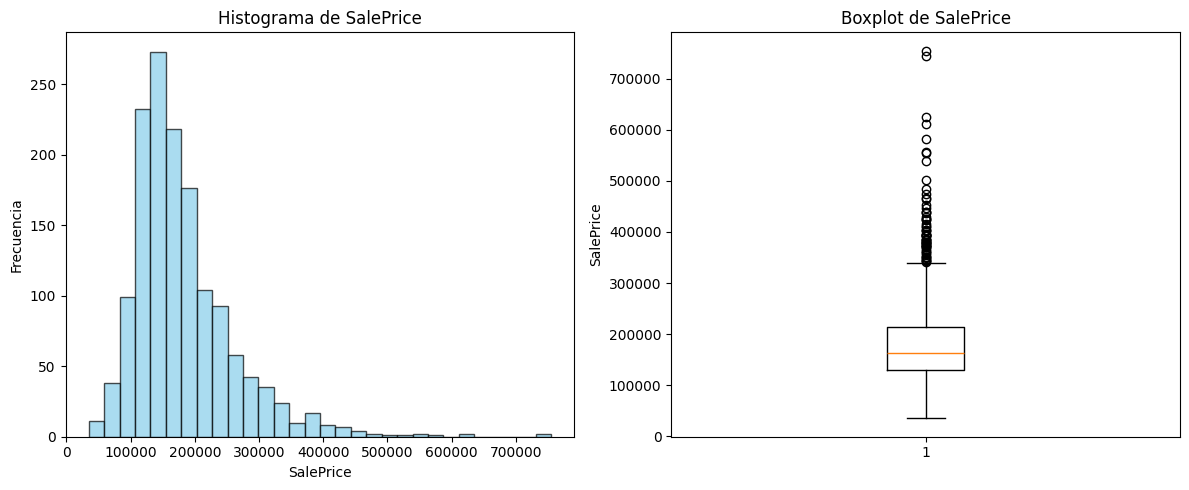

### CLASSIFICATION TREE

#### Agrupamiento

c:\Users\JM\Documents\Data Mining\Decision_Trees_2\ct_tree.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = km.fit_predict(X_pca)


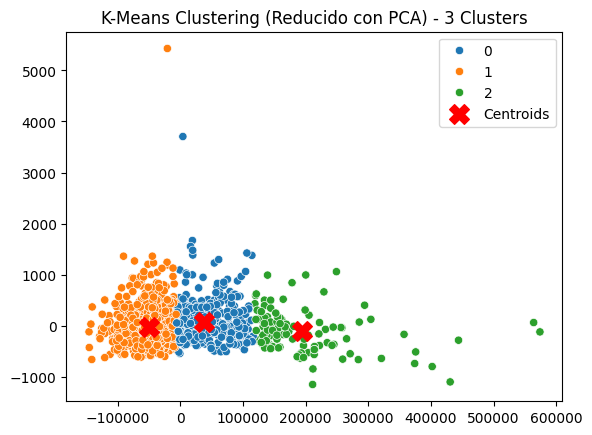

In [16]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import cross_val_score, cross_val_predict
import ct_tree

cluster_set = house_prices[['GrLivArea', 'SalePrice','1stFlrSF','GarageArea']]
cluster_set.dropna()

cluster_set = ct_tree.breif_clustering(cluster_set, 3)

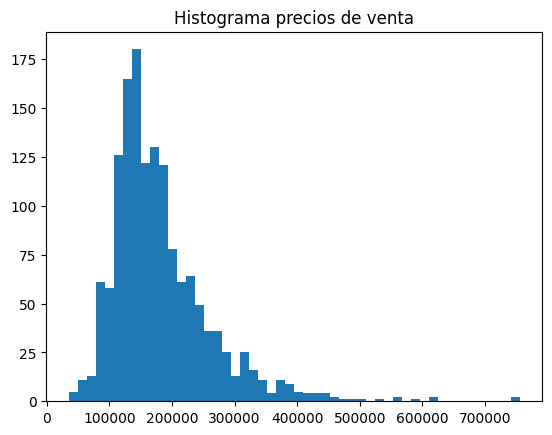

C:\Users\JM\AppData\Local\Temp\ipykernel_43148\36126288.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


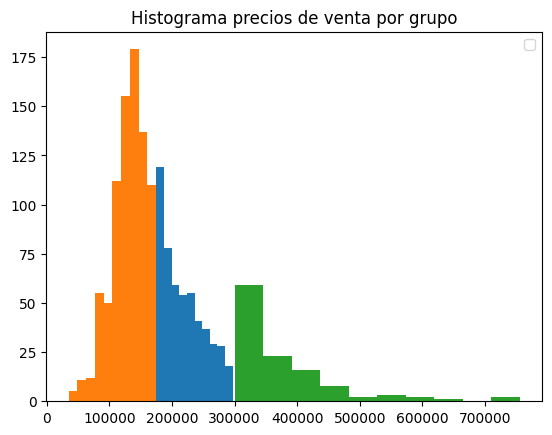

In [17]:
plt.title("Histograma precios de venta")
plt.hist(cluster_set['SalePrice'], bins=50)
plt.show()

plt.title("Histograma precios de venta por grupo")
for i in range(3):
    sp_i = cluster_set[cluster_set['Cluster']==i]
    plt.hist(sp_i['SalePrice'])
plt.legend()
plt.show()

In [18]:
tem = house_prices[house_prices.columns]
object_cols = tem.select_dtypes(include=['object']).columns
fuzzy_hp = pd.get_dummies(tem, columns=object_cols, drop_first=True)
fuzzy_hp['SpThird'] = cluster_set['Cluster']
fuzzy_hp.pop('SalePrice')
fuzzy_hp.groupby('SpThird').size()

SpThird
0    518
1    826
2    116
dtype: int64

#### Arbol de Clasificacion

In [19]:
y = fuzzy_hp.pop('SpThird')
X_ct = fuzzy_hp
X_train, X_test, y_train, y_test = train_test_split(
    X_ct, y, test_size=0.3, train_size=0.7, random_state=42
)


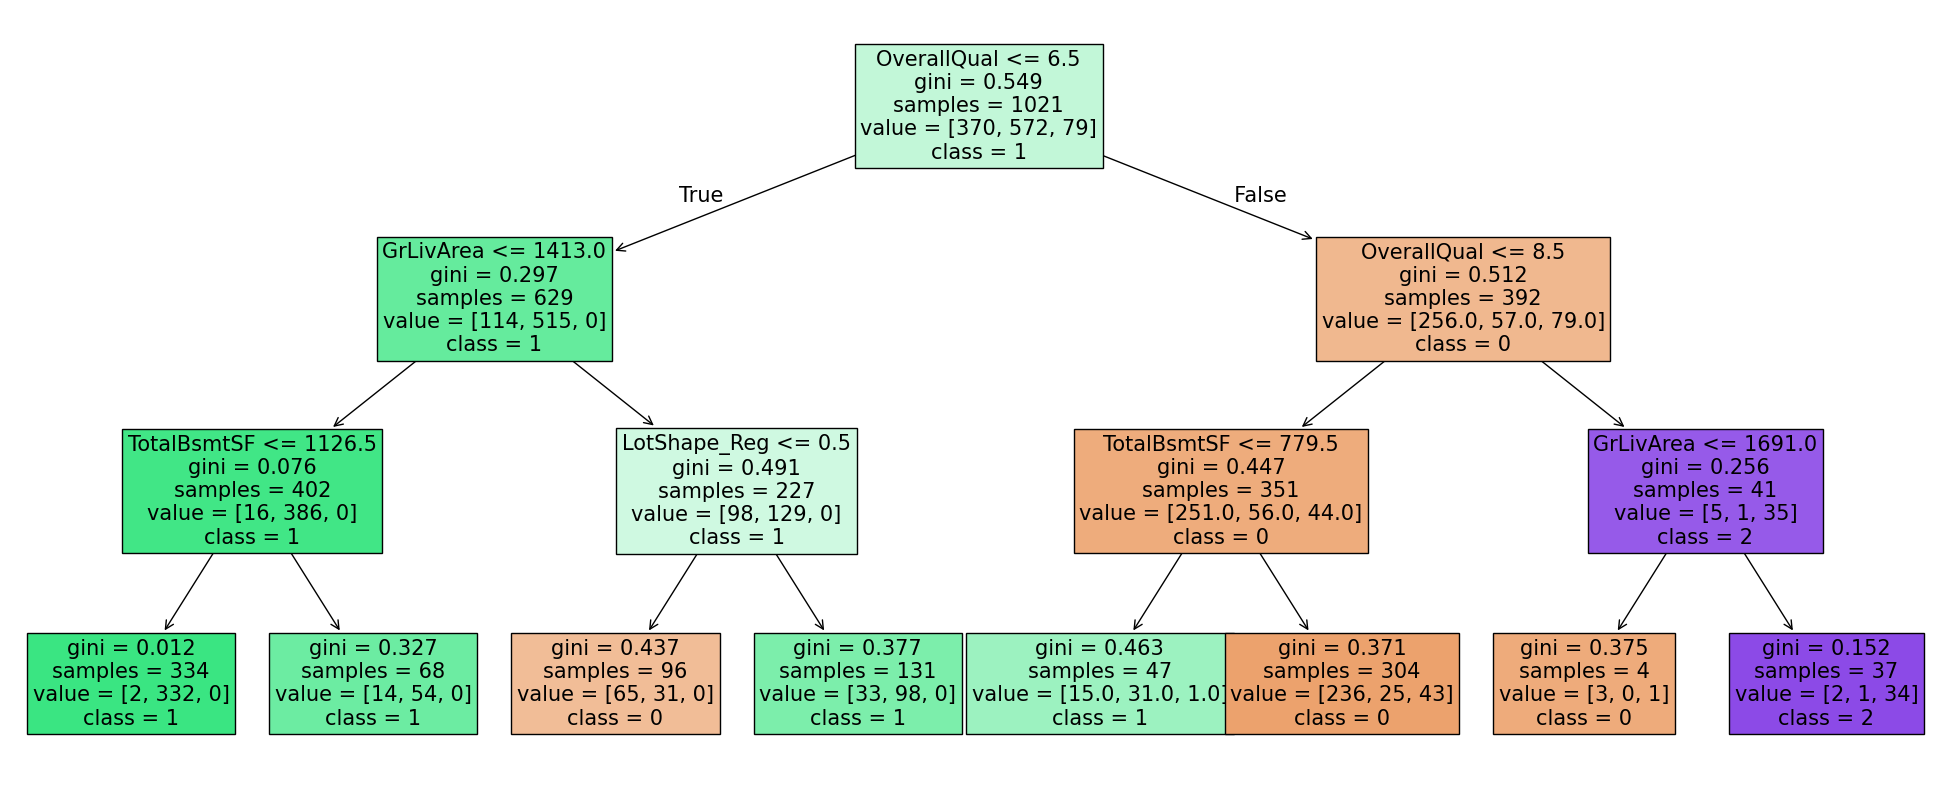

In [20]:
arbol = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42) 
arbol = arbol.fit(X_train, y_train) 
plt.figure(figsize=(25,10))
tree.plot_tree(arbol,feature_names=fuzzy_hp.columns,
               class_names=['0','1','2'],filled=True, fontsize=15 )
plt.show()

Precisión del modelo: 0.82
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       148
           1       0.85      0.92      0.88       253
           2       1.00      0.49      0.65        37

    accuracy                           0.82       438
   macro avg       0.86      0.71      0.75       438
weighted avg       0.82      0.82      0.81       438



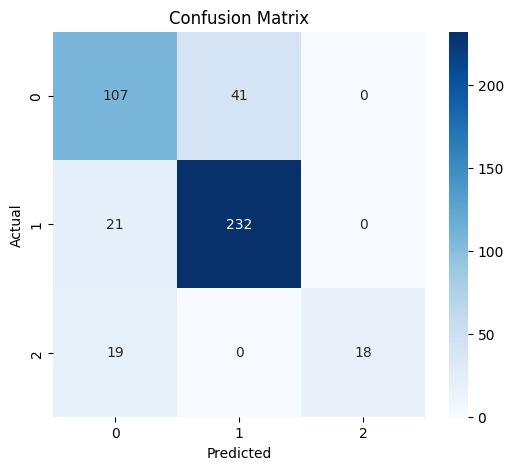

In [21]:
y_pred = arbol.predict(X_test)
ct_tree.metrics_and_cm(y_pred, y_test)

### Validacion Cruzada

In [22]:
arbol_cv= DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42) 

cv_scores = cross_val_score(arbol_cv, X_ct, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [0.8390411  0.85273973 0.82534247 0.79452055 0.81506849]
Mean accuracy: 0.8253424657534246


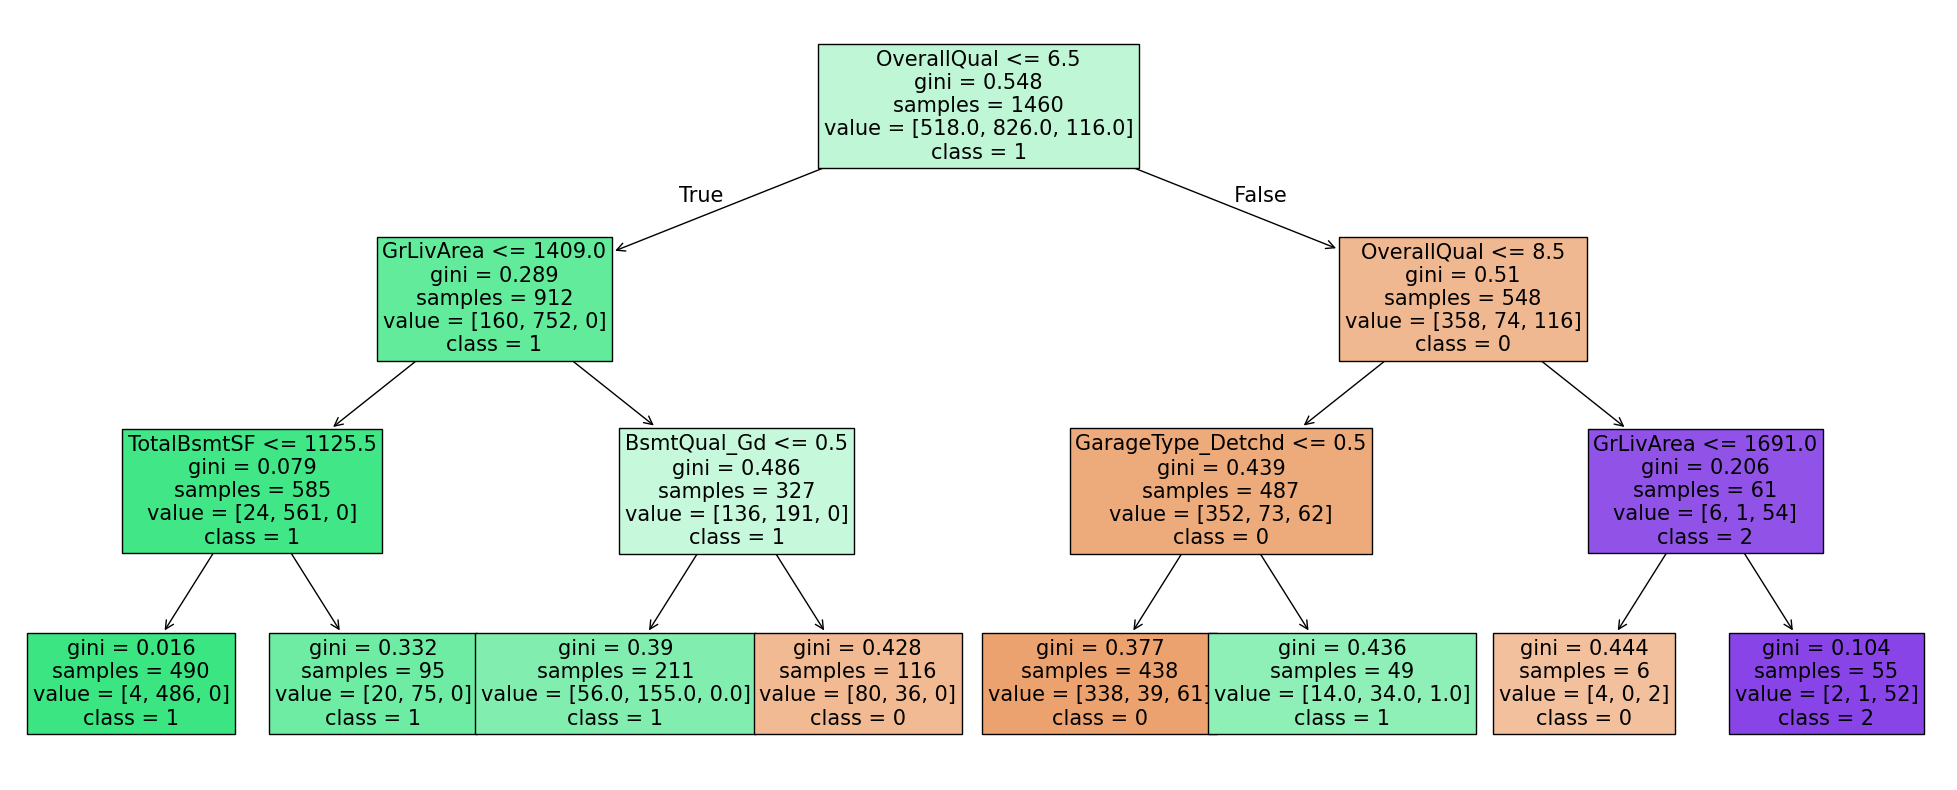

In [23]:
arbol_cv.fit(X_ct, y)
plt.figure(figsize=(25,10))
tree.plot_tree(arbol_cv,feature_names=fuzzy_hp.columns,
               class_names=['0','1','2'],filled=True, fontsize=15 )
plt.show()

Precision promedio del modelo: 0.8253424657534246
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       518
           1       0.89      0.88      0.89       826
           2       0.90      0.45      0.60       116

    accuracy                           0.83      1460
   macro avg       0.84      0.72      0.75      1460
weighted avg       0.83      0.83      0.82      1460



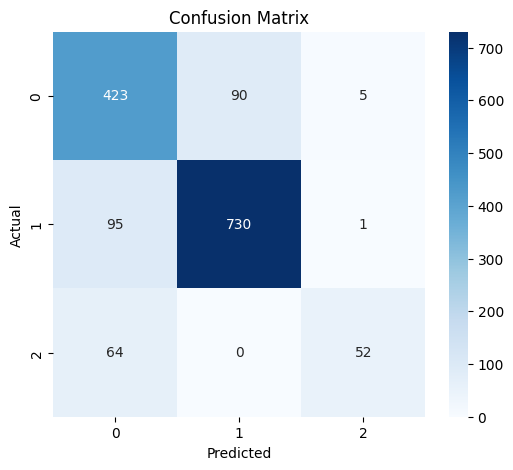

In [24]:
y_pred = cross_val_predict(arbol_cv, X_ct, y, cv=5)
ct_tree.cv_metrics_and_cm(cv_scores, y, y_pred)

### Pofundidad variada

PROFUNDIDAD =  2
Precisión del modelo: 0.82
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       148
           1       0.84      0.94      0.88       253
           2       0.95      0.51      0.67        37

    accuracy                           0.82       438
   macro avg       0.85      0.71      0.75       438
weighted avg       0.82      0.82      0.81       438



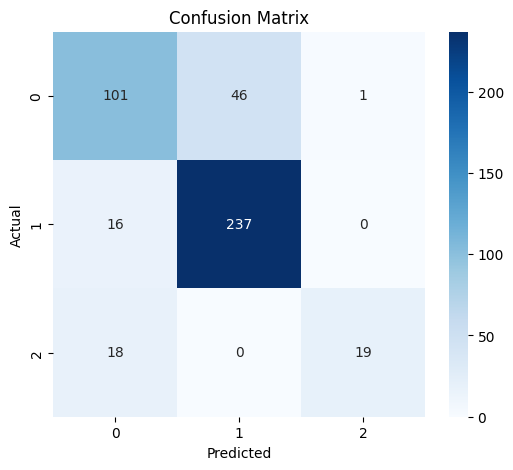

PROFUNDIDAD =  4
Precisión del modelo: 0.82
              precision    recall  f1-score   support

           0       0.75      0.72      0.74       148
           1       0.86      0.89      0.88       253
           2       0.88      0.76      0.81        37

    accuracy                           0.82       438
   macro avg       0.83      0.79      0.81       438
weighted avg       0.82      0.82      0.82       438



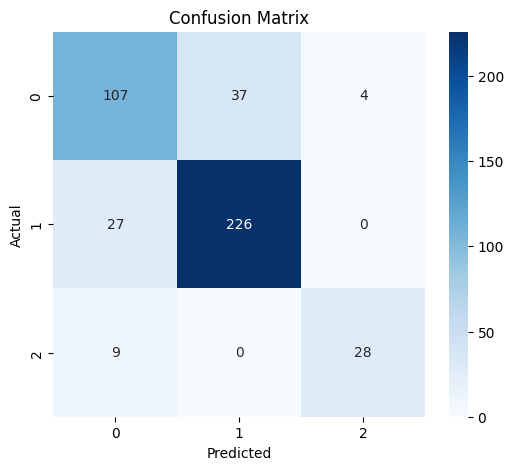

PROFUNDIDAD =  5
Precisión del modelo: 0.80
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       148
           1       0.86      0.89      0.87       253
           2       0.69      0.73      0.71        37

    accuracy                           0.80       438
   macro avg       0.76      0.76      0.76       438
weighted avg       0.80      0.80      0.80       438



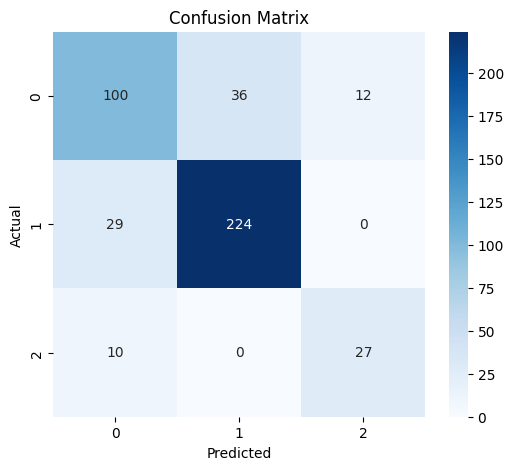

In [26]:
depths = [2,4,5]
for i in depths:
    print("PROFUNDIDAD = ",i)
    arbol = DecisionTreeClassifier(criterion="gini", max_depth=i, random_state=42) 
    arbol = arbol.fit(X_train, y_train)
    y_pred = arbol.predict(X_test)
    ct_tree.metrics_and_cm(y_pred, y_test)